In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [52]:
df_train = pd.read_csv("../dataset/train.csv")
df_test =  pd.read_csv("../dataset/test.csv")

In [54]:
df_test.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
Id,,,,,,,,,
1,4,1,1,1,2,1,1,1,1
2,1,1,2,1,2,1,2,1,1
3,3,1,1,1,1,1,2,1,1
4,6,1,1,3,2,1,1,1,1
5,6,1,1,1,1,1,1,1,1


In [53]:
df_train.set_index('Id', inplace=True)
df_test.set_index('Id', inplace=True)
df_train = df_train[df_train['bare_nuclei']>=1]

In [43]:
df_train.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
Id,,,,,,,,,,
1,5,1,1,1,2,1,3,1,1,2
2,5,4,4,5,7,10,3,2,1,2
3,3,1,1,1,2,2,3,1,1,2
4,6,8,8,1,3,4,3,7,1,2
5,4,1,1,3,2,1,3,1,1,2


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 1 to 468
Data columns (total 10 columns):
clump_thickness                453 non-null int64
uniformity_of_cell_size        453 non-null int64
uniformity_of_cell_shape       453 non-null int64
marginal_adhesion              453 non-null int64
single_epithelial_cell_size    453 non-null int64
bare_nuclei                    453 non-null int64
bland_chromatin                453 non-null int64
normal_nucleoli                453 non-null int64
mitosis                        453 non-null int64
class                          453 non-null int64
dtypes: int64(10)
memory usage: 38.9 KB


In [45]:
df_train.describe()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,4.679912,3.397351,3.492274,2.975717,3.532009,4.066225,3.673289,3.207506,1.748344,2.825607
std,3.064422,3.065104,3.017362,2.875258,2.427163,3.814276,2.309871,3.157550,1.897431,0.985765
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,7.000000,5.000000,5.000000,4.000000,5.000000,8.000000,5.000000,5.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


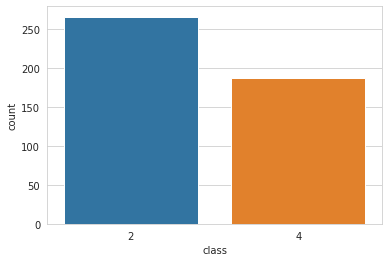

In [46]:
sns.countplot(x='class', data=df_train)

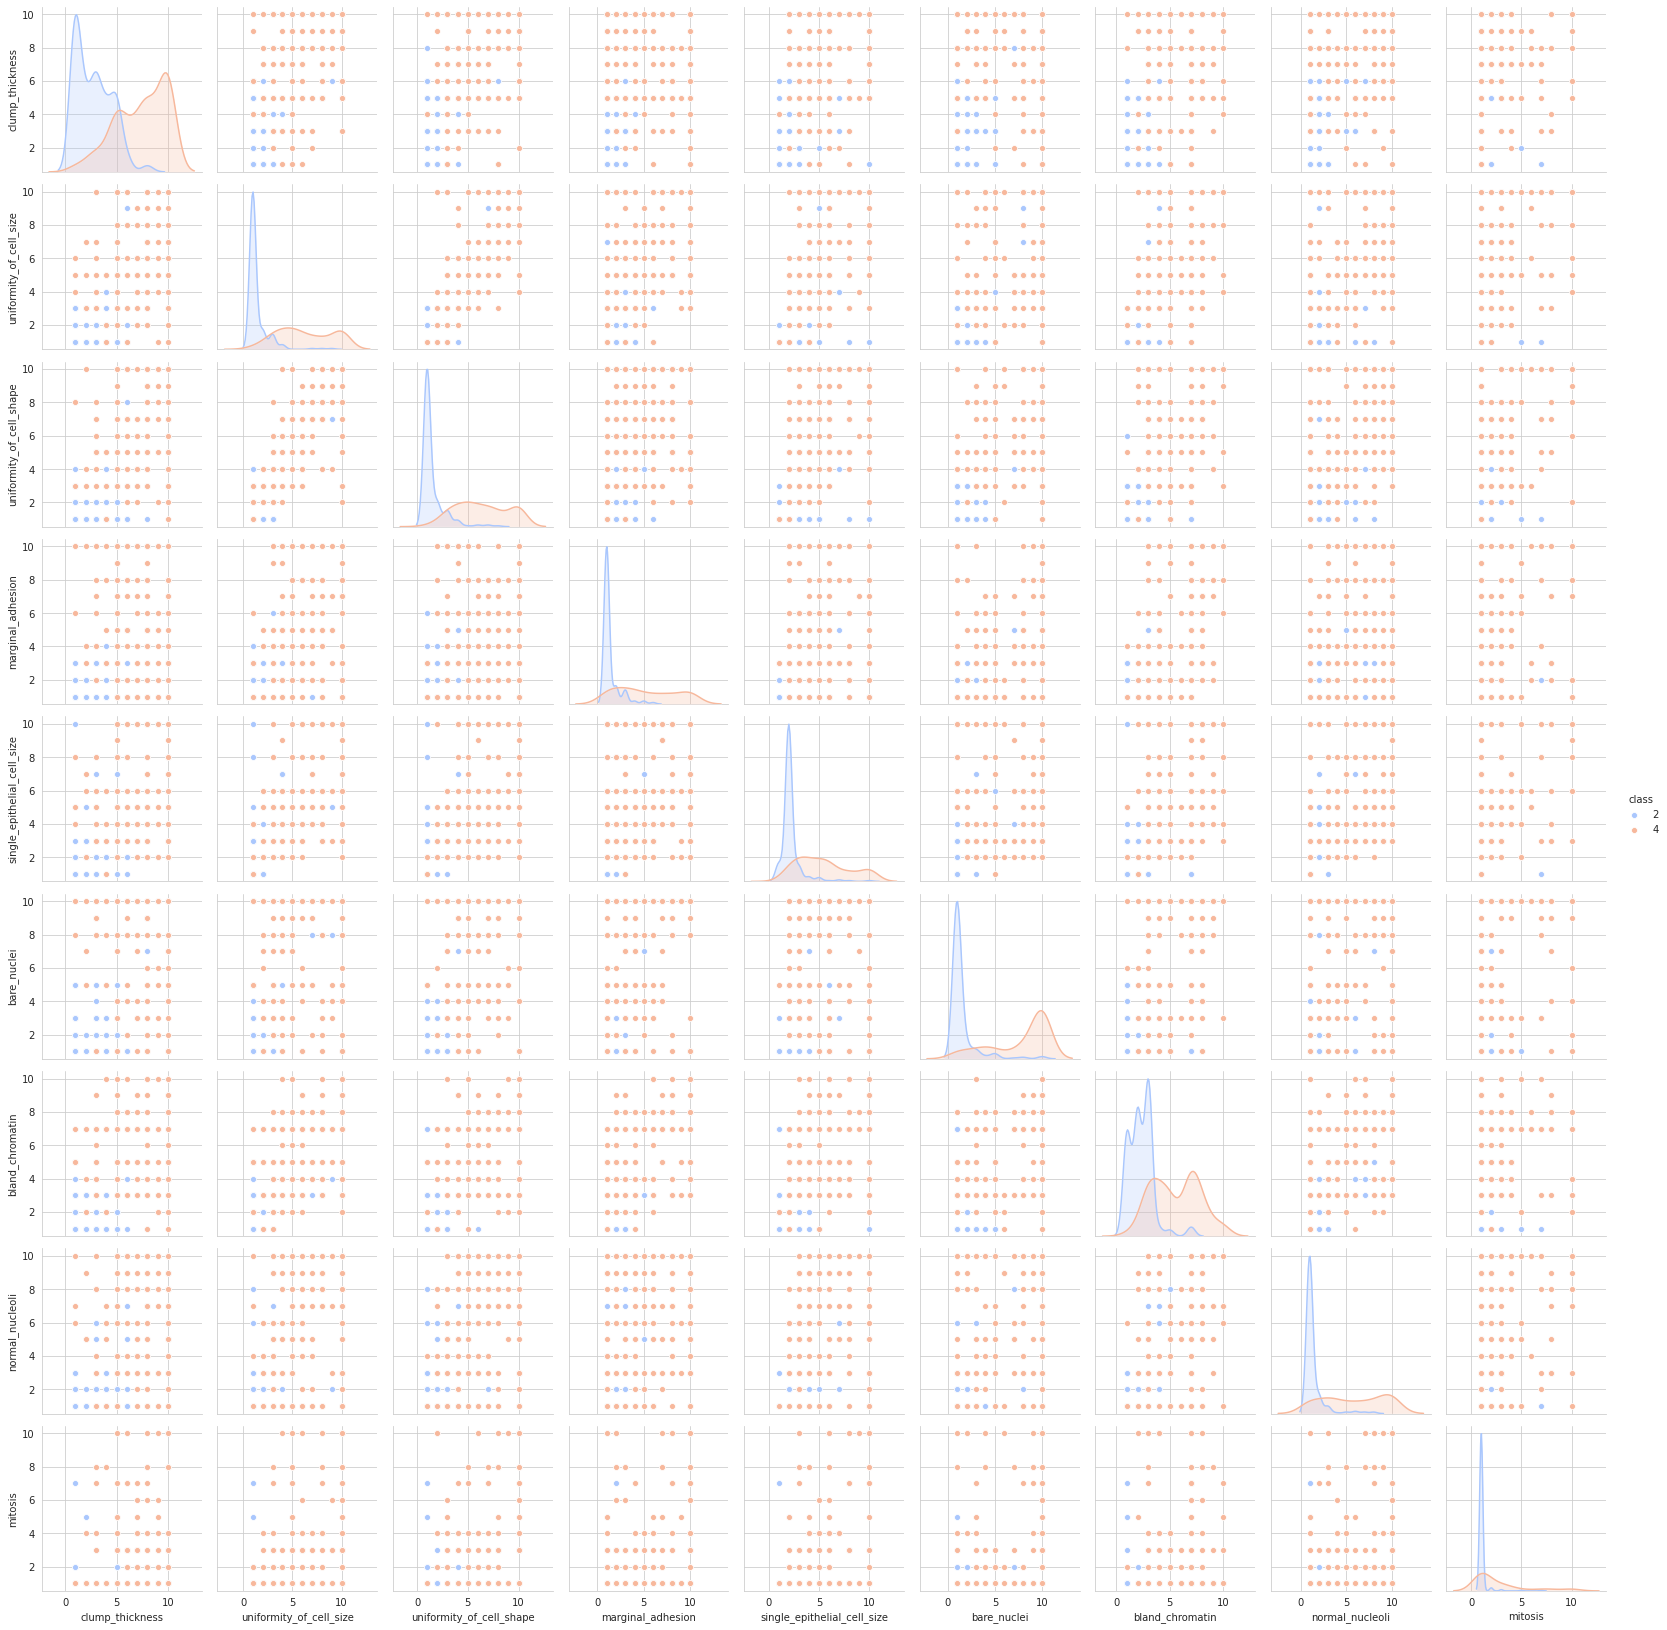

In [57]:
sns.pairplot(df_train, hue='class',palette='coolwarm')

In [48]:
correlation = df_train.corr()

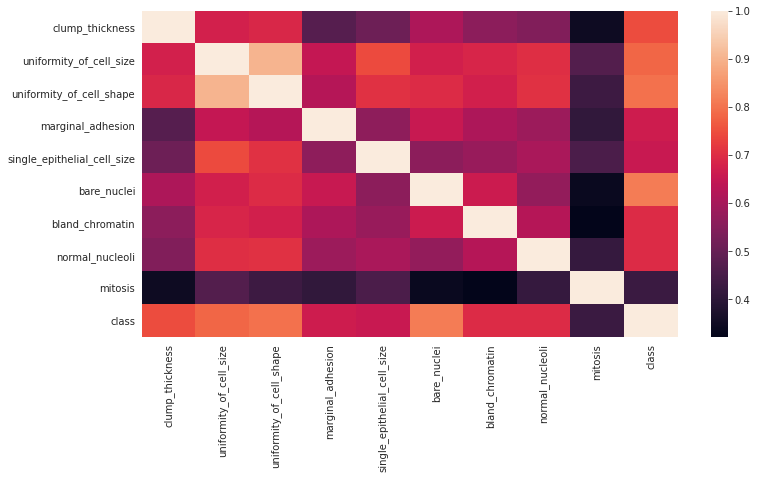

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(correlation)

In [62]:
X = df_train.drop('class', axis=1)
y = df_train['class']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
error_rates=[]

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rates.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

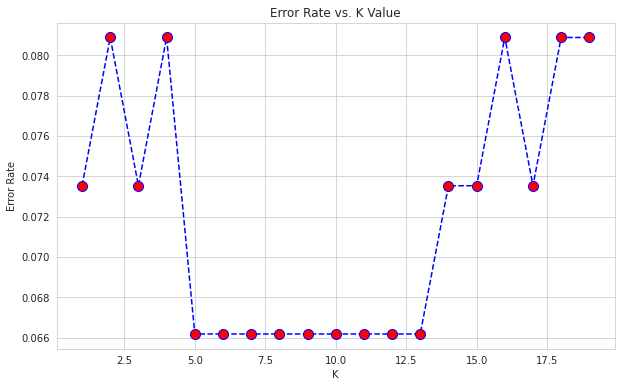

In [83]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

In [88]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[84  4]
 [ 5 43]]


              precision    recall  f1-score   support

           2       0.94      0.95      0.95        88
           4       0.91      0.90      0.91        48

    accuracy                           0.93       136
   macro avg       0.93      0.93      0.93       136
weighted avg       0.93      0.93      0.93       136



In [89]:
X_test = df_test

In [104]:
pred_final = knn.predict(X_test)

In [105]:
df_sub = pd.DataFrame(pred_final, columns=['class'])

In [112]:
df_sub['Id'] = list(range(1,102))

In [115]:
df_sub.set_index('Id', inplace=True)

In [116]:
df_sub.head()

,class
Id,
1,2
2,2
3,2
4,2
5,2


In [117]:
df_sub.to_csv('submission.csv')